In [1]:
# import libraries
import numpy as np
import pandas as pd
import dionysus as d
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import re

%matplotlib widget

In [2]:
# define the classes
class Point:
    id: int
    coord: np.ndarray
    dominant: int
    second_dominant: int
    values: list[float]
    tissue: bool

point_list: list[Point] = []
edge_set: set[tuple[int]] = set()
triangle_set: set[tuple[int]] = set()
tetrahedron_set: set[tuple[int]] = set()


In [3]:
# load from st data files
points_data = pd.read_csv("assets/HT112C1/points.csv", header=None)
tets_data = pd.read_csv("assets/HT112C1/tets.csv", header=None)

# load from toy data files
# points_data = pd.read_csv("assets/torus-points.csv")
# tets_data = pd.read_csv("assets/torus-tets.csv")

# points_data = pd.read_csv("assets/small-torus/points.csv", header=None)
# tets_data = pd.read_csv("assets/small-torus/tets.csv", header=None)

if points_data.isna().any().any():
    raise ValueError("NaN values detected in the data file!")

In [4]:
coords = points_data.iloc[:, :3]
x_limits = coords.iloc[:, 0].agg(["min", "max"]).tolist()
y_limits = coords.iloc[:, 1].agg(["min", "max"]).tolist()
z_limits = coords.iloc[:, 2].agg(["min", "max"]).tolist()

x_range = abs(x_limits[1] - x_limits[0])
x_middle = (x_limits[0] + x_limits[1]) / 2
y_range = abs(y_limits[1] - y_limits[0])
y_middle = (y_limits[0] + y_limits[1]) / 2
z_range = abs(z_limits[1] - z_limits[0])
z_middle = (z_limits[0] + z_limits[1]) / 2

plot_radius = 0.5 * max([x_range, y_range, z_range])

# plot the point cloud
# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(points_data.iloc[:, 0].to_numpy(), points_data.iloc[:, 1].to_numpy(), points_data.iloc[:, 2].to_numpy())
# ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
# ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
# ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
# plt.show()

In [5]:
num_materials = points_data.shape[1] - 3

for i, row in points_data.iterrows():
    point = Point()
    point.id = i
    point.coord = row.iloc[:3]
    values = row.iloc[3:]
    point.dominant = values.idxmax() - 3
    point.second_dominant = values.nlargest(2).iloc[1:].idxmax() - 3
    point.values = values.to_list()
    point.tissue = point.dominant != num_materials - 1
    point_list.append(point)


edge_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
triangle_combinations = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]


def same_material(point_indices):
    return all([point_list[point].dominant == point_list[point_indices[0]].dominant for point in point_indices])


def all_valid(point_indices):
    return all([point_list[point].tissue for point in point_indices])


# TODO: use hash table for faster lookup
for i, tet in tets_data.iterrows():
    edges = [sorted([tet.iloc[combination[0]], tet.iloc[combination[1]]]) for combination in edge_combinations]
    [edge_set.add(tuple(x)) for x in edges if all_valid(x)]
    triangles = [
        sorted([tet.iloc[combination[0]], tet.iloc[combination[1]], tet.iloc[combination[2]]]) for combination in triangle_combinations
    ]
    [triangle_set.add(tuple(x)) for x in triangles if all_valid(x)]
    if all_valid(tet):
        tetrahedron_set.add(tuple(sorted(tet)))

In [6]:
points_by_material = [[] for _ in range(num_materials)]
faces_by_material = [[] for _ in range(num_materials)]
point_index_in_material_group = {}
face_index_in_material_group = {}

for i, point in enumerate(point_list):
    points_by_material[point.dominant].append(point)
    point_index_in_material_group[i] = len(points_by_material[point.dominant]) - 1

for i, triangle in enumerate(triangle_set):
    if point_list[triangle[0]].dominant == point_list[triangle[1]].dominant and point_list[triangle[0]].dominant == point_list[triangle[2]].dominant:
        faces_by_material[point_list[triangle[0]].dominant].append(triangle)
        face_index_in_material_group[i] = len(faces_by_material[point_list[triangle[0]].dominant]) - 1

Material 0 has no points
Material 1 has no points
Material 2 has no points
Material 3 has 3702 points, 17090 edges, 22720 triangles, 9331 tets, 52843 simplices in total
Material 3 dimension 0 has 291 finite points and 6 infinite points


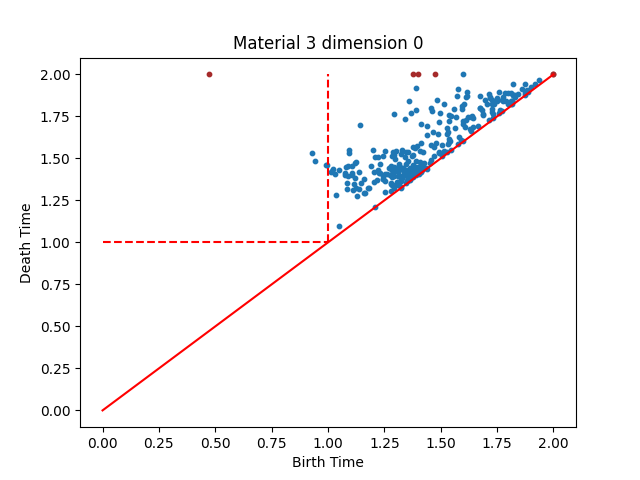

Material 3 dimension 1 has 314 finite points and 5 infinite points


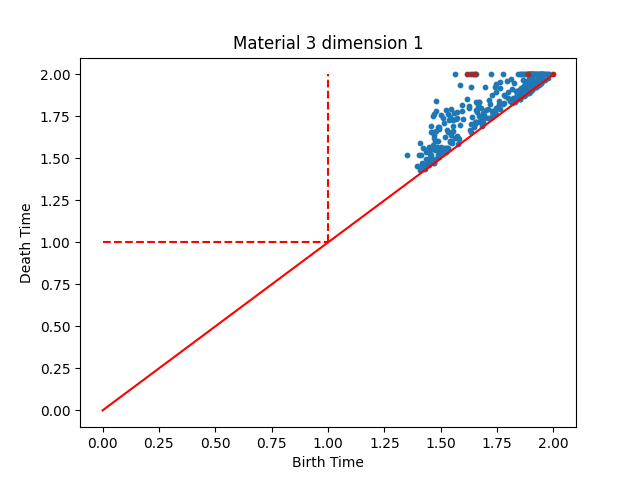

Material 3 dimension 2 has 0 finite points and 0 infinite points


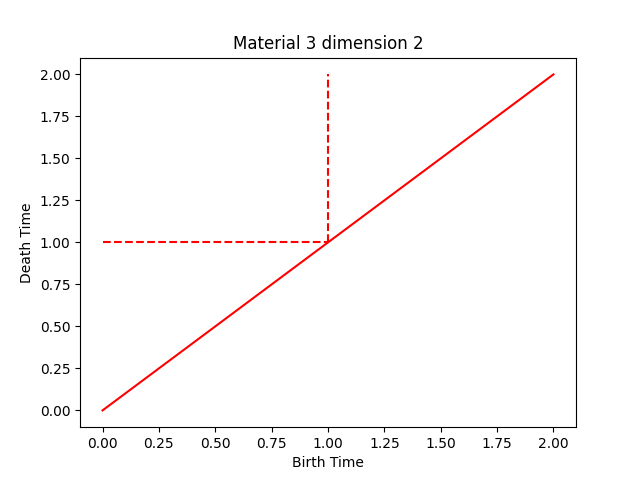

Material 3 has 5 but no faces, 3D mesh display skipped
Material 4 has 3702 points, 17090 edges, 22720 triangles, 9331 tets, 52843 simplices in total
Material 4 dimension 0 has 271 finite points and 6 infinite points


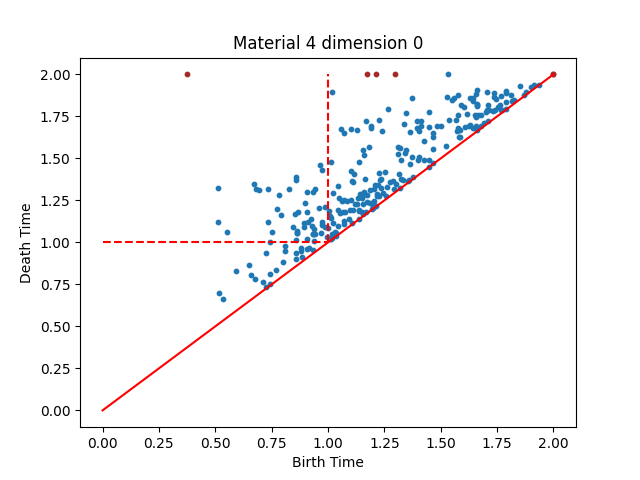

Material 4 dimension 1 has 275 finite points and 5 infinite points


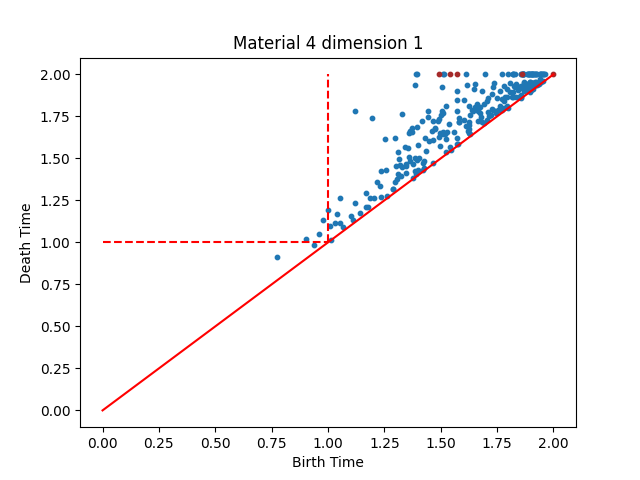

Material 4 dimension 2 has 0 finite points and 0 infinite points


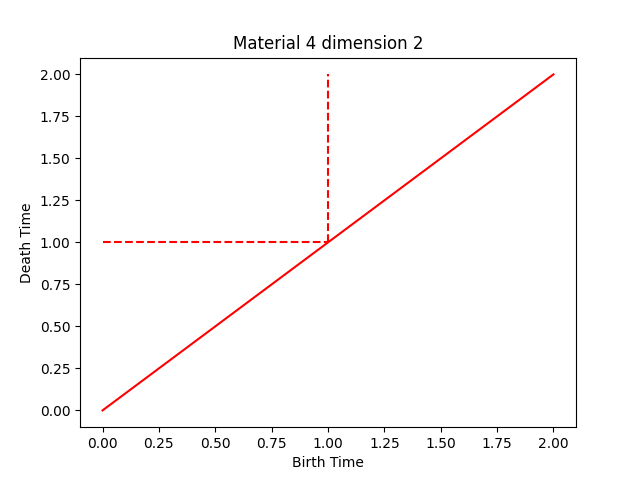

Material 4 has 220 points and 246 faces


Material 5 has no points
Material 6 has no points
Material 7 has 3702 points, 17090 edges, 22720 triangles, 9331 tets, 52843 simplices in total
Material 7 dimension 0 has 251 finite points and 6 infinite points


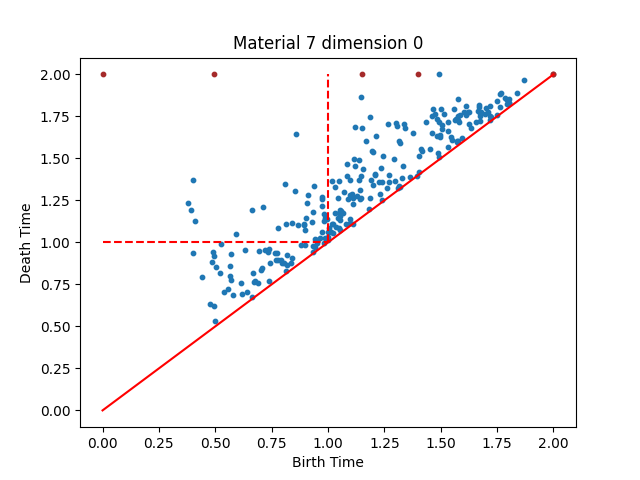

Material 7 dimension 1 has 291 finite points and 5 infinite points


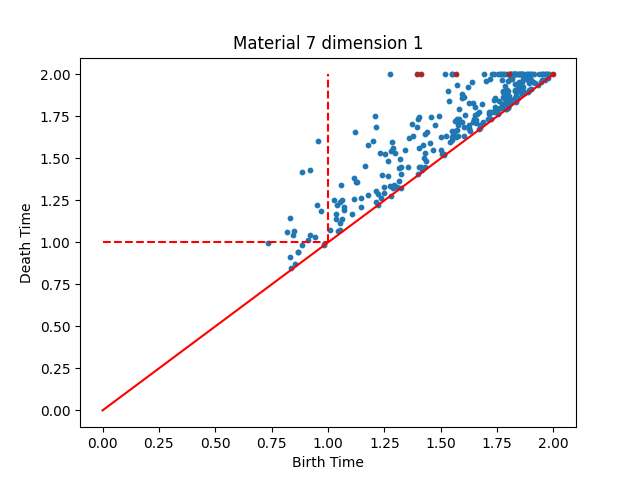

Material 7 dimension 2 has 0 finite points and 0 infinite points


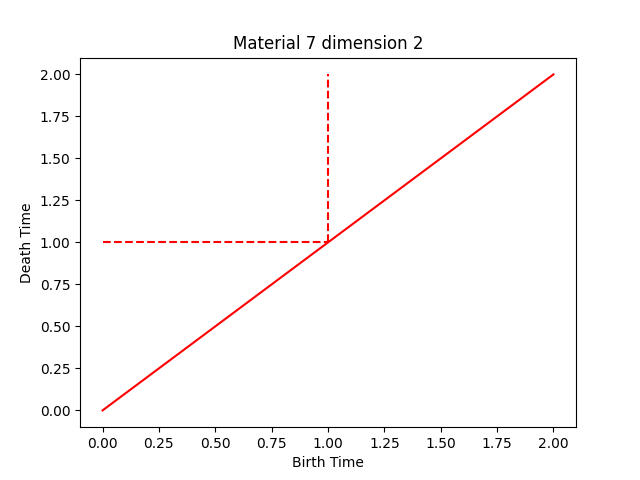

Material 7 has 405 points and 603 faces


Material 8 has no points
Material 9 has no points
Material 10 has no points
Material 11 has no points
Material 12 has no points
Material 13 has 3702 points, 17090 edges, 22720 triangles, 9331 tets, 52843 simplices in total
Material 13 dimension 0 has 282 finite points and 6 infinite points


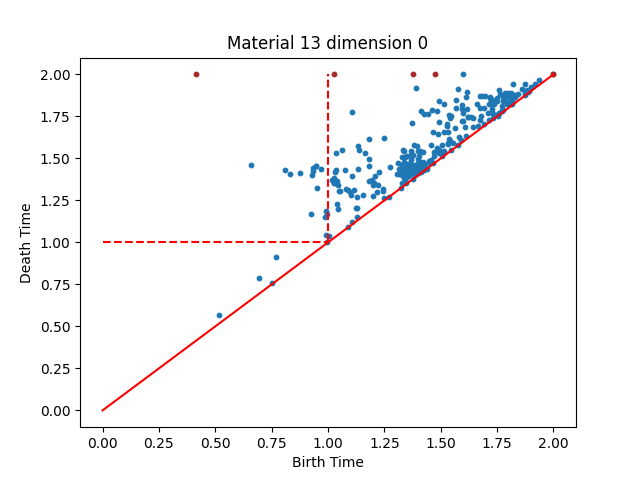

Material 13 dimension 1 has 295 finite points and 5 infinite points


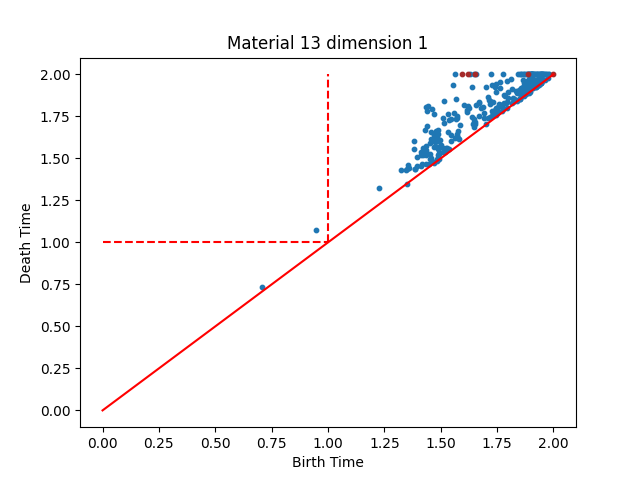

Material 13 dimension 2 has 0 finite points and 0 infinite points


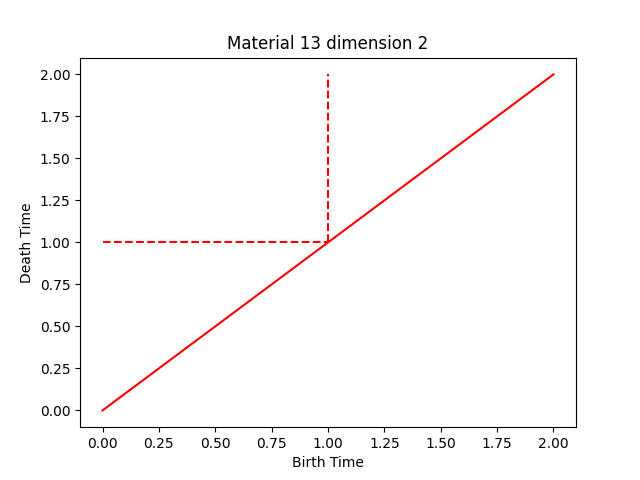

Material 13 has 97 points and 277 faces


Material 14 has 3702 points, 17090 edges, 22720 triangles, 9331 tets, 52843 simplices in total
Material 14 dimension 0 has 237 finite points and 6 infinite points


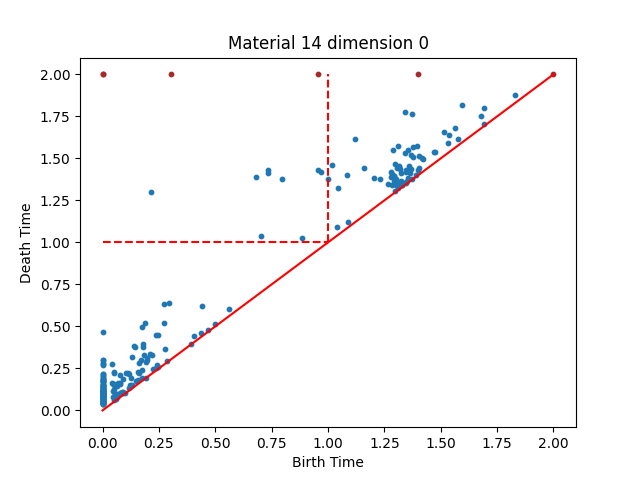

Material 14 dimension 1 has 296 finite points and 5 infinite points


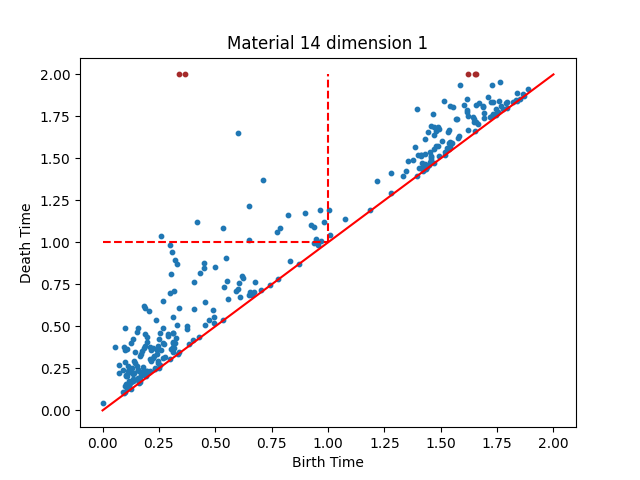

Material 14 dimension 2 has 0 finite points and 0 infinite points


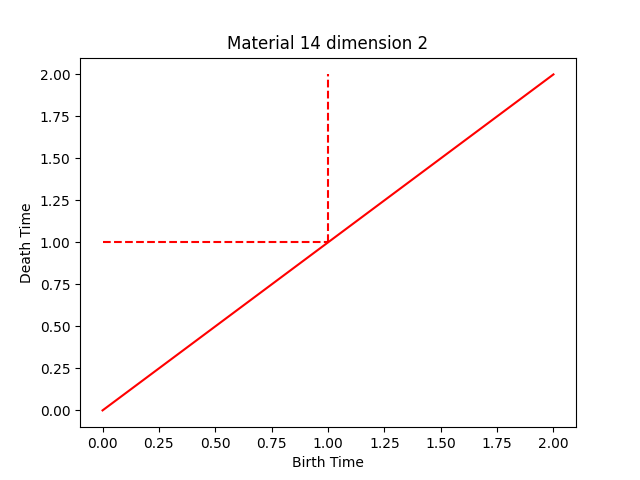

Material 14 has 2190 points and 11468 faces


Material 15 has 3702 points, 17090 edges, 22720 triangles, 9331 tets, 52843 simplices in total
Material 15 dimension 0 has 257 finite points and 6 infinite points


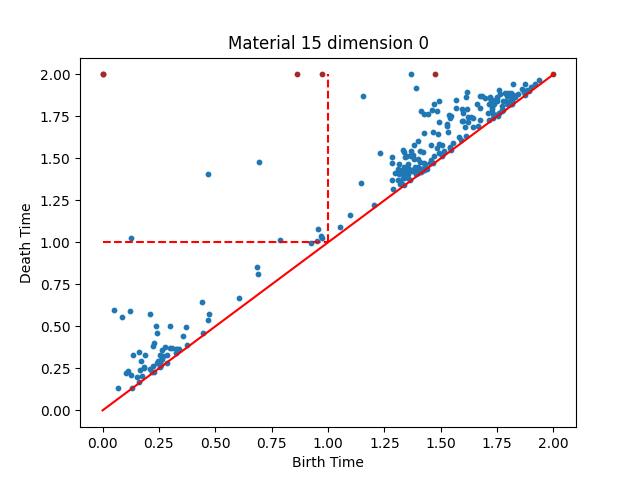

Material 15 dimension 1 has 270 finite points and 5 infinite points


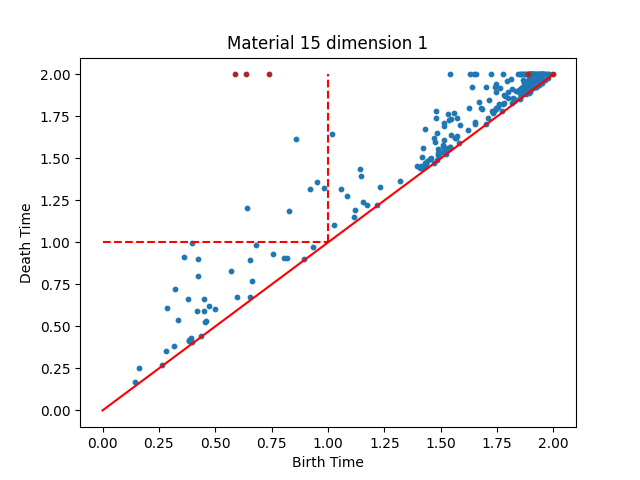

Material 15 dimension 2 has 0 finite points and 0 infinite points


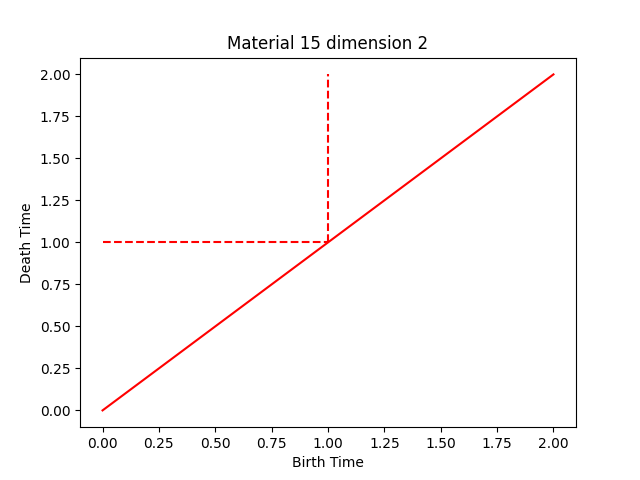

Material 15 has 785 points and 3261 faces


Material 16 has no points
Material 17 has 3702 points, 17090 edges, 22720 triangles, 9331 tets, 52843 simplices in total
Material 17 dimension 0 has 288 finite points and 6 infinite points


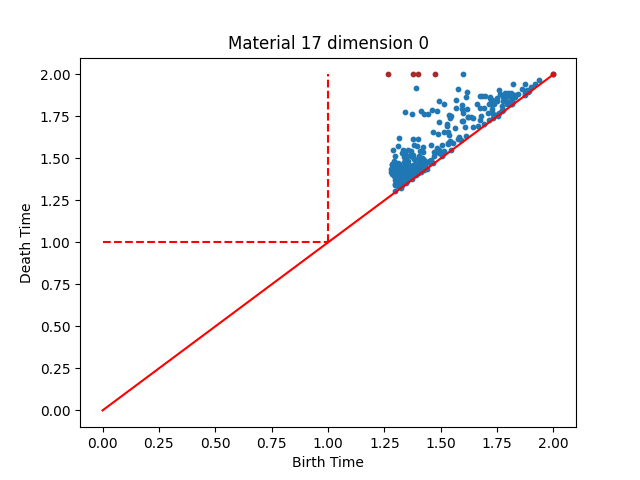

Material 17 dimension 1 has 306 finite points and 5 infinite points


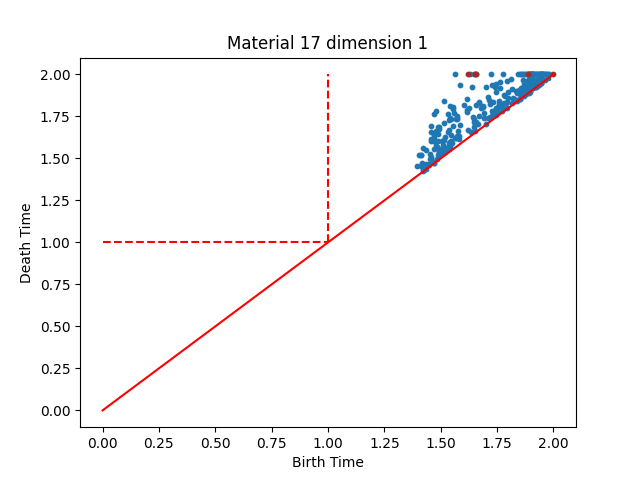

Material 17 dimension 2 has 0 finite points and 0 infinite points


/var/folders/g4/q0ldylzx59q46dnwjw4_cq240000gn/T/ipykernel_40681/4030878312.py:52: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



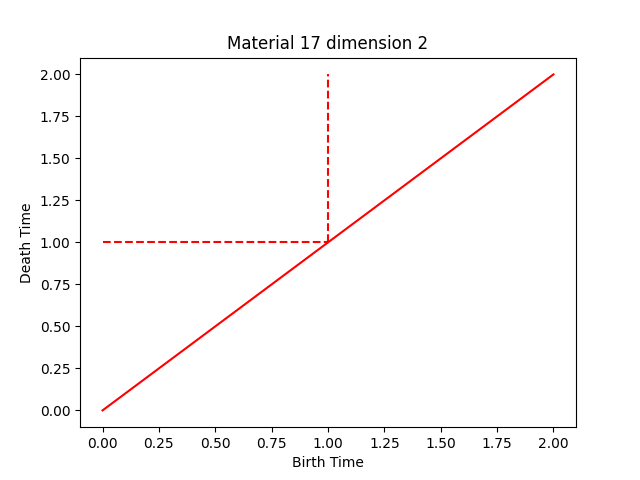

Material 17 has 14730 but no faces, 3D mesh display skipped


In [7]:
generator_indices_by_material_and_dimension = [[] for _ in range(num_materials)]
filtrations_by_material = [[] for _ in range(num_materials)]
ph_matrix_by_material = [[] for _ in range(num_materials)]
diagrams_by_material = [[] for _ in range(num_materials)]

# point_index_filtered = [None for _ in range(len(point_list))]
# count = 0
# for i, point in enumerate(point_list):
#     if point.tissue:
#         point_index_filtered[i] = count
#         count += 1

def get_value(point, material):
    values = point.values
    if material == point.dominant:
        return values[point.dominant] - values[point.second_dominant]
    else:
        return values[material] - values[point.dominant]


# iterate through the materials
for material in range(num_materials):
    if len(points_by_material[material]) == 0:
        print(f"Material {material} has no points")
        continue

    points = [([point.id], 1 - get_value(point, material)) for point in point_list if point.tissue]
    edges = [(list(edge), 1 - min([get_value(point_list[point], material) for point in edge])) for edge in edge_set]
    triangles = [(list(triangle), 1 - min([get_value(point_list[point], material) for point in triangle])) for triangle in triangle_set]
    tets = [(list(tet), 1 - min([get_value(point_list[point], material) for point in tet])) for tet in tetrahedron_set]

    simplices = []
    simplices.extend(points)
    simplices.extend(edges)
    simplices.extend(triangles)
    simplices.extend(tets)

    print(f"Material {material} has {len(points)} points, {len(edges)} edges, {len(triangles)} triangles, {len(tets)} tets, {len(simplices)} simplices in total")

    filtration = d.Filtration()
    for vertices, time in simplices:
        filtration.append(d.Simplex(vertices, time))
    filtration.sort()

    ph_matrix = d.homology_persistence(filtration, method="column")
    diagrams = d.init_diagrams(ph_matrix, filtration)

    for i, diagram in enumerate(diagrams):
        if i == 3:
            continue

        plt.figure()
        plt.title(f"Material {material} dimension {i}")
        filtered_diagram = [pt for pt in diagram if pt.birth < pt.death]

        # filter points that live forever
        finite_birth_times = [pt.birth for pt in filtered_diagram if pt.death != float("inf")]
        finite_death_times = [pt.death for pt in filtered_diagram if pt.death != float("inf")]
        infinite_birth_times = [pt.birth for pt in filtered_diagram if pt.death == float("inf")]
        infinite_death_times = [2.0 for pt in filtered_diagram if pt.death == float("inf")]

        print(
            f"Material {material} dimension {i} has {len(finite_birth_times)} finite points and {len(infinite_birth_times)} infinite points"
        )

        # plot using plt.scatter instead
        plt.scatter(finite_birth_times, finite_death_times, s=10)
        plt.scatter(infinite_birth_times, infinite_death_times, s=10, color="brown")
        plt.plot([0, 2], [0, 2], "r")
        plt.plot([1, 1], [1, 2], "r--")
        plt.plot([0, 1], [1, 1], "r--")
        plt.xlabel("Birth Time")
        plt.ylabel("Death Time")
        plt.show()

    # dictionary to reverse lookup the killer of a homology
    pairs = {}
    for j in range(len(ph_matrix)):
        if ph_matrix.pair(j) != ph_matrix.unpaired:
            pairs[ph_matrix.pair(j)] = j

    # finding the generators for 1 and 2 cycle
    generators_by_dimension = [[] for _ in range(3) ]
    for dimension, diagram in enumerate(diagrams):
        for point in diagram:
            if point.birth > 1.0 or point.death < 1.0:
                continue

            generator = [[int(s) for s in re.findall(r'<(.*?)>', str(filtration[int(index)]))[0].split(',')] for index in re.findall(r'\*(\d+)', str(ph_matrix[pairs.get(point.data)]))] if pairs.get(point.data) != None else []
            generators_by_dimension[dimension].append(generator)
    
    
    # vertices = [list(point_list[point[0][0]].coord) for point in points]
    # intensities = [point[1] for point in points]
    # faces = [[point_index_filtered[v] for v in triangle[0]] for triangle in triangles]

    vertices = [list(point.coord) for point in points_by_material[material]]
    intensities = [point.values[material] for point in points_by_material[material]]
    faces = [[point_index_in_material_group[v] for v in face] for face in faces_by_material[material]]

    if len(faces) == 0: 
        print(f"Material {material} has {len(vertices)} but no faces, 3D mesh display skipped")
        continue
    else:
        print(f"Material {material} has {len(vertices)} points and {len(faces)} faces")

    x, y, z = zip(*vertices)
    i, j, k = zip(*faces)

    fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, intensity=intensities, colorscale=[[0, 'navy'], [0.25, 'cyan'], [0.5, 'lime'], [0.75, 'yellow'], [1, 'red']], opacity=0.01)])

    fig.update_layout(scene=dict(
        xaxis=dict(range=[x_middle - plot_radius, x_middle + plot_radius]),
        yaxis=dict(range=[y_middle - plot_radius, y_middle + plot_radius]),
        zaxis=dict(range=[z_middle - plot_radius, z_middle + plot_radius]),
        aspectmode='manual'),
        title_text=f"Material {material}",
        width=800,
        height=600,
        updatemenus=[{
            'type': 'buttons',
            'buttons': [
                {
                    'label': 'Opacity 0.01',
                    'method': 'restyle',
                    'args': [{'opacity': 0.01}, [0]]
                },
                {
                    'label': 'Opacity 0.1',
                    'method': 'restyle',
                    'args': [{'opacity': 0.1}, [0]]
                },
                {
                    'label': 'Opacity 1.0',
                    'method': 'restyle',
                    'args': [{'opacity': 1.0}, [0]]
                },
                # {
                #     'label': 'Show 1-cycles',
                #     'method': 'update',
                #     'args': [{"visible": [False] * len()}]
                # }
            ]
        }]
    )

    def plot_edge(fig, edge):
        edge = [list(point_list[endpoint].coord) for endpoint in edge]
        fig.add_trace(go.Scatter3d(
            x=[edge[0][0], edge[1][0], None], 
            y=[edge[0][1], edge[1][1], None], 
            z=[edge[0][2], edge[1][2], None],
            mode='lines',
            showlegend=False,
            line=dict(color='black', width=5),
            name="edges"
        ))

    # display the edges of 1-cycles
    # handles = [[[list(point_list[endpoint].coord) for endpoint in edge] for edge in loop ] for loop in generators_by_dimension[1]]
    num_edges = 0
    [[plot_edge(fig, edge) for edge in loop ] for loop in generators_by_dimension[1]]
    fig.show()

    filtrations_by_material[material] = filtration
    ph_matrix_by_material[material] = ph_matrix
    diagrams_by_material[material] = diagrams